In [2]:
using RDatasets
using Clustering
using Plots

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


#### kmeans

In [3]:
#make a random dataset with 1000 points
# each point is a 5-dimensional vector
X=rand(5,1000);
print(size(X))

# performs K-means over X, trying to group them into 20 clusters
# set maximum number of iterations to 200
# set display to :iter, so it shows progressive info at each iteration
R=Clustering.kmeans(X,20;maxiter=200,display=:iter)

# the number of resultant clusters should be 20
@assert Clustering.nclusters(R) == 20


(5, 1000)  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.885612e+02
      1       1.461005e+02      -4.246073e+01 |       20
      2       1.384252e+02      -7.675261e+00 |       20
      3       1.340078e+02      -4.417426e+00 |       20
      4       1.301791e+02      -3.828727e+00 |       20
      5       1.281052e+02      -2.073879e+00 |       20
      6       1.271680e+02      -9.371745e-01 |       19
      7       1.261361e+02      -1.031937e+00 |       19
      8       1.254393e+02      -6.968142e-01 |       18
      9       1.249454e+02      -4.938518e-01 |       15
     10       1.245128e+02      -4.326492e-01 |       15
     11       1.242385e+02      -2.743241e-01 |       13
     12       1.240882e+02      -1.503076e-01 |        7
     13       1.239892e+02      -9.897396e-02 |        8
     14       1.239096e+02      -7.954155e-02 |        4
     15       1.238486e+02      -6.099119e-02 

In [4]:
# obtain the resultant assignments
# a[i] indicates which cluster the i-th sample is assigned to

a=Clustering.assignments(R)

# obtain the number of samples in each cluster
# c[k] is the number of samples assigned to the k-th cluster
c=Clustering.counts(R)

# get the centers (i.e. mean vectors)
# M is a matrix of size (5, 20)
# M[:,k] is the mean vector of the k-th cluster
M=R.centers

5×20 Array{Float64,2}:
 0.796619  0.655199  0.718205  0.223836  …  0.257568  0.65641   0.804817
 0.79957   0.222358  0.749158  0.430676     0.726908  0.784858  0.786519
 0.67194   0.795823  0.674723  0.641808     0.251338  0.296613  0.206174
 0.750257  0.264976  0.186741  0.217937     0.634323  0.25787   0.671648
 0.586386  0.269775  0.220249  0.247383     0.764864  0.802729  0.284573

#### Example with plot

In [3]:
iris=RDatasets.dataset("datasets","iris")
head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [4]:
features = permutedims(convert(Array, iris[:,1:4]), [2, 1])   # use matrix() on Julia v0.2
result = kmeans( features, 3 )                                # onto 3 clusters

KmeansResult{Float64}([6.85385 5.006 5.88361; 3.07692 3.428 2.74098; 5.71538 1.462 4.38852; 2.05385 0.246 1.43443], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 3, 1, 1, 1, 3, 1, 1, 3], [0.01998, 0.20038, 0.17398, 0.27598, 0.03558, 0.45838, 0.17238, 0.00438, 0.65198, 0.14158  …  0.157337, 0.441953, 0.731626, 0.112722, 0.272722, 0.355799, 0.822118, 0.399645, 0.691953, 0.7072], [39, 50, 61], [39.0, 50.0, 61.0], 78.85566582597721, 12, true)

┌ Info: it is surprising that this function is called - please report a use case as a Plots issue
└ @ Plots /home/ye/.julia/packages/Plots/ex9On/src/args.jl:1525


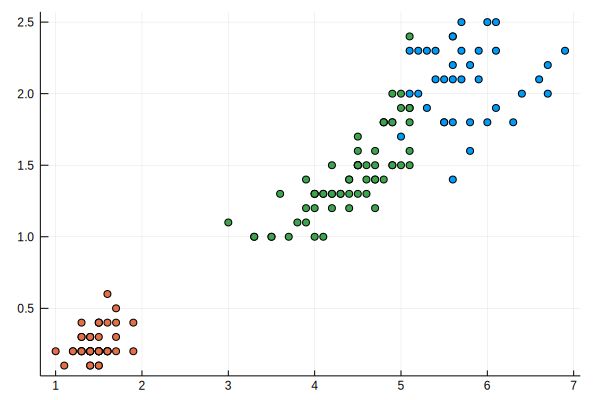

In [7]:
Plots.scatter(iris[:PetalLength],iris[:PetalWidth],color=result.assignments,label="")

 #### Hierarchical Clustering

In [8]:
D=rand(1000,1000)
D+=D'
result=Clustering.hclust(D,linkage=:single)

Hclust{Float64}([-327 -409; -267 -780; … ; -374 997; -571 998], [0.00302886, 0.00485726, 0.00630893, 0.00633063, 0.00672484, 0.00691137, 0.00703798, 0.00707861, 0.00710182, 0.0072737  …  0.0986357, 0.0989636, 0.0991813, 0.100599, 0.101998, 0.103211, 0.103939, 0.10447, 0.112394, 0.120186], [571, 374, 151, 114, 537, 253, 682, 888, 247, 90  …  772, 20, 554, 294, 691, 275, 433, 547, 142, 971], :single)